# 線形カルマンフィルタ

## 1. 状態方程式と観測方程式

　時刻$k$におけるシステムの状態${\bf x}_k$は、時刻$k-1$の状態をもとに次のように表現される．

${\bf x}_k = {\bf A}_k {\bf x}_{k-1} + {\bf B}_k {\bf u}_k + {\bf w}_k$

　ここで、${\bf A}_k , {\bf B}_k$はシステムの時間遷移に関する線形モデル、
${\bf u}_k$は制御入力、${\bf w}_k$は平均$0$、共分散行列${\bf Q}_k$の多次元正規分布に従うノイズ（状態誤差）である．この式を状態方程式と呼ぶ．

　真の状態である${\bf x}_k$は観測不可能であるが、観測値${\bf z}_k$と以下の関係にある．
 
${\bf z}_k = {\bf H}_k {\bf x}_{k-1} + {\bf v}_k$

　ここで、${\bf H}_k$は状態空間から観測空間へ変換を行うモデルであり、${\bf v}_k$は平均$0$、共分散行列${\bf R}_k$の多次元正規分布に従うノイズ（観測誤差）である．この式を観測方程式と呼ぶ．

## 2. カルマンフィルタ
 
 　カルマンフィルタでは、予測と更新の2つのステップにより状態を推定する．時刻$k$地点での時刻$k$の推定値を${\hat{\bf x}_{k|k}}$とする．予測ステップでは、状態方程式を用いて、時刻$k-1$時点における時刻$k$の予測値${\hat{\bf x}_{k|k-1}}$と予測誤差${\bf P}_{k|k-1}$を求める．更新ステップでは、観測値${\bf z}_{k}$と予測値${\hat{\bf x}_{k|k-1}}$を、観測誤差と予測誤差の大きさが小さいほど高い重みをつけて平均することで、推定値${\hat{\bf x}_{k|k}}$を求める．2つのステップは以下の式で表現される．
  
**予測**

${\hat{\bf x}_{k|k-1}} = {\bf A}_k {\hat{\bf x}_{k-1|k-1}} + {\bf B}_k {\bf u}_k + {\bf w}_k$

${\bf P}_{k|k-1} = {\bf F}_{k}{\bf P}_{k-1|k-1}{\bf F}_{k}^T + {\bf G}_{k}{\bf Q}_{k}{\bf G}_{k}^T $

**更新**
 
${\bf e}_{k} = {\bf z}_k - {\bf H}_k {\hat{\bf x}_{k|k-1}}$

${\bf S}_{k} = {\bf R}_k + {\bf H}_{k}{\bf P}_{k|k-1}{\bf H}_{k}^T $

${\bf K}_{k} = {\bf P}_{k|k-1}{\bf H}_{k}^T {\bf S}_{k}^{-1}$

${\hat{\bf x}_{k|k}} = {\hat{\bf x}_{k|k-1}} + {\bf K}_k {\bf e}_{k}$

${\bf P}_{k|k} = ({\bf I} - {\bf K}_{k}{\bf H}_{k}){\bf P}_{k|k-1}$

##  3. 例題

　２次元座標を動く物体の位置$(x, y)$を観測し、カルマンフィルタで推定する．物体は$v_x = 30$[km/h] $ = 8.3$[m/s],$v_y = 3.6$[km/h] $ = 1$[m/s]で等速直線運動し、真値に乗る誤差は時刻$k$によらず$\sigma _x = 0.001$[m],$\sigma _y = 0.001$[m]、観測値に乗る誤差は時刻$k$によらず$\sigma _x = 0.2$[m],$\sigma _y = 0.2$[m]とする．この時、各行列は以下のように表される．
 
${\bf A}=
\left(
    \begin{array}{cc}
      1 & 0 \\
      0 & 1
    \end{array}
\right)
$,
${\bf B}=
\left(
    \begin{array}{cc}
      \Delta t & 0 \\
      0 & \Delta t
    \end{array}
\right)
$,
${\bf u}=
\left(
    \begin{array}{c}
      v_x \\
      v_y
    \end{array}
\right)
$,
${\bf Q}=
\left(
    \begin{array}{cc}
      0.001 & 0 \\
      0 & 0.001
    \end{array}
\right)
$,
${\bf H}=
\left(
    \begin{array}{cc}
      1 & 0 \\
      0 & 1
    \end{array}
\right)
$
${\bf R}=
\left(
    \begin{array}{cc}
      0.2 & 0 \\
      0 & 0.2
    \end{array}
\right)
$

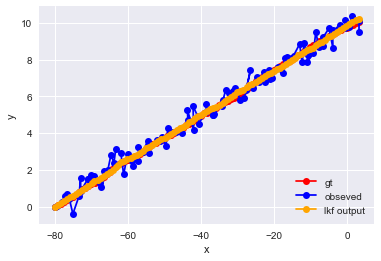

In [5]:
%matplotlib inline
from kalman_filter_r2 import plot_pos
plot_pos()

**メモ**

${\bf H}=
\left(
    \begin{array}{cc}
      1 & 0 \\
      0 & 1
    \end{array}
\right)
$
であり、観測誤差と予測誤差が時刻$k$によらない時、カルマンフィルタの更新式は以下のようにまとめることが出来る．

${\hat{\bf x}_{k|k}} = {\hat{\bf x}_{k|k-1}} + 
{\bf P}{({\bf R}+ {\bf P})}^{-1}({\bf z}_k - {\hat{\bf x}_{k|k-1}})$

${\bf x}$が1次元の時、

${\hat x_{k|k}}$

$ = {\hat x_{k|k-1}} + 
{\sigma _p}{({\sigma _r} + {\sigma _p})}^{-1}(z_k - {\hat x_{k|k-1}})$

$ = \frac{\sigma _r}{{\sigma _r} + {\sigma _p}}{\hat x_{k|k-1}}
+ \frac{\sigma _p}{{\sigma _r} + {\sigma _p}}z_k$

となり、カルマンフィルタによる推定値${\hat x_{k|k}}$は予測誤差${\sigma _p}$と観測誤差${\sigma _r}$の大きさが小さいほど高い重みをつけて予測値と観測値を平均していることが分かる．

もし予測誤差${\sigma _p}=0$であるならば、推定値は${\hat x_{k|k}} = {\hat x_{k|k-1}}$となる．（状態方程式で予測した値を100%信じる．）

もし観測誤差${\sigma _r}=0$であるならば、推定値は${\hat x_{k|k}} = z_k$となる．（観測値を100%信じる．）

**参考**

[1]wikipedia

[2]Pythonでカルマンフィルタを実装してみる
https://satomacoto.blogspot.jp/2011/06/python.html

[3]シンプルなモデルとイラストでカルマンフィルタを直感的に理解してみるhttp://qiita.com/MoriKen/items/0c80ef75749977767b43